In [ ]:
import pandas as pd

# Load the CSV file from /content/
df = pd.read_csv('/content/CSD_Cleaned_Inventory_Data.csv')

# Display the first few rows
df.head()


,Item_Code,Item_Name,Category,Stock_Quantity,Reorder_Level,Unit_Price,Purchase_Cost,Last_Purchase_Date,Weekly_Demand,Monthly_Sales_Units,Sales_Revenue,Lead_Time_Days,Ordering_Cost,Holding_Cost_Per_Unit,EOQ,Stockout_Events,Overstock_Events,Supplier_Name
0,CSD0001,Eraser,Stationery,220,45,103.42,69.35,2025-04-30,10,50,5171.00,15.0,150,5.17,53.86,0,1,Amul
1,CSD0002,Phenyl,Household,104,80,442.23,272.13,2025-01-27,35,105,46434.15,15.0,100,22.11,30.82,0,0,Patanjali
2,CSD0003,Marker,Stationery,86,45,490.34,343.37,2025-01-29,29,87,42659.58,7.0,100,24.52,26.64,0,0,Itc
3,CSD0004,Atta,Grocery,83,36,344.22,211.29,2025-02-27,1,3,1032.66,5.0,100,17.21,5.90,0,1,Itc
4,CSD0005,Sanitarypads,Personal Care,90,25,294.26,188.35,2025-03-19,16,80,23540.80,3.0,150,14.71,40.39,0,0,Local Vendor


In [ ]:
# Basic structure
df.info()

# Count of missing values per column
print("\nMissing values per column:\n")
print(df.isnull().sum())

# Quick look at unique values in Category and Supplier_Name
print("\nUnique categories:\n", df['Category'].unique())
print("\nUnique suppliers:\n", df['Supplier_Name'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Item_Code              3000 non-null   object 
 1   Item_Name              3000 non-null   object 
 2   Category               3000 non-null   object 
 3   Stock_Quantity         3000 non-null   int64  
 4   Reorder_Level          3000 non-null   int64  
 5   Unit_Price             3000 non-null   float64
 6   Purchase_Cost          3000 non-null   float64
 7   Last_Purchase_Date     3000 non-null   object 
 8   Weekly_Demand          3000 non-null   int64  
 9   Monthly_Sales_Units    3000 non-null   int64  
 10  Sales_Revenue          3000 non-null   float64
 11  Lead_Time_Days         3000 non-null   float64
 12  Ordering_Cost          3000 non-null   int64  
 13  Holding_Cost_Per_Unit  3000 non-null   float64
 14  EOQ                    3000 non-null   float64
 15  Stoc

In [ ]:
# Clean and standardize Category
df['Category'] = df['Category'].str.strip().str.lower()
df['Category'] = df['Category'].replace({
    'personalcare': 'personal care',
    'personal care': 'personal care',
    'stationery': 'stationery',
    'household': 'household',
    'grocery': 'grocery',
    'beverages': 'beverages'
})
df['Category'] = df['Category'].str.title()

# Clean Item_Name and Supplier_Name
df['Item_Name'] = df['Item_Name'].str.strip().str.title()
df['Supplier_Name'] = df['Supplier_Name'].str.strip().str.title()

In [ ]:
df['Last_Purchase_Date'] = pd.to_datetime(df['Last_Purchase_Date'], errors='coerce', dayfirst=True)

/tmp/ipython-input-4-3852548554.py:1: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Last_Purchase_Date'] = pd.to_datetime(df['Last_Purchase_Date'], errors='coerce', dayfirst=True)


In [ ]:
df['Lead_Time_Days'] = pd.to_numeric(df['Lead_Time_Days'], errors='coerce')  # ensure numeric
df['Lead_Time_Days'].fillna(df['Lead_Time_Days'].median(), inplace=True)

/tmp/ipython-input-5-44832628.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Lead_Time_Days'].fillna(df['Lead_Time_Days'].median(), inplace=True)


In [ ]:
df.drop_duplicates(subset=['Item_Code'], keep='first', inplace=True)

In [ ]:
# Check for any remaining nulls
print("Nulls:\n", df.isnull().sum())

# Confirm cleaned categories
print("\nCleaned Categories:\n", df['Category'].unique())

# Preview the cleaned dataset
df.head()

Nulls:
 Item_Code                0
Item_Name                0
Category                 0
Stock_Quantity           0
Reorder_Level            0
Unit_Price               0
Purchase_Cost            0
Last_Purchase_Date       0
Weekly_Demand            0
Monthly_Sales_Units      0
Sales_Revenue            0
Lead_Time_Days           0
Ordering_Cost            0
Holding_Cost_Per_Unit    0
EOQ                      0
Stockout_Events          0
Overstock_Events         0
Supplier_Name            0
dtype: int64

Cleaned Categories:
 ['Stationery' 'Household' 'Grocery' 'Personal Care' 'Beverages']


,Item_Code,Item_Name,Category,Stock_Quantity,Reorder_Level,Unit_Price,Purchase_Cost,Last_Purchase_Date,Weekly_Demand,Monthly_Sales_Units,Sales_Revenue,Lead_Time_Days,Ordering_Cost,Holding_Cost_Per_Unit,EOQ,Stockout_Events,Overstock_Events,Supplier_Name
0,CSD0001,Eraser,Stationery,220,45,103.42,69.35,2025-04-30,10,50,5171.00,15.0,150,5.17,53.86,0,1,Amul
1,CSD0002,Phenyl,Household,104,80,442.23,272.13,2025-01-27,35,105,46434.15,15.0,100,22.11,30.82,0,0,Patanjali
2,CSD0003,Marker,Stationery,86,45,490.34,343.37,2025-01-29,29,87,42659.58,7.0,100,24.52,26.64,0,0,Itc
3,CSD0004,Atta,Grocery,83,36,344.22,211.29,2025-02-27,1,3,1032.66,5.0,100,17.21,5.90,0,1,Itc
4,CSD0005,Sanitarypads,Personal Care,90,25,294.26,188.35,2025-03-19,16,80,23540.80,3.0,150,14.71,40.39,0,0,Local Vendor


In [ ]:
# Corrected column list
cols = ['Stock_Quantity', 'Monthly_Sales_Units', 'Lead_Time_Days', 'Unit_Price', 'Weekly_Demand']

# Generate descriptive statistics
desc_stats = df[cols].agg(['mean', 'median', 'std']).T
desc_stats.columns = ['Mean', 'Median', 'Standard Deviation']
desc_stats = desc_stats.round(2)

# Display result
print("Descriptive Statistics Summary:")
display(desc_stats)


Descriptive Statistics Summary:


,Mean,Median,Standard Deviation
Stock_Quantity,120.30,120.00,58.47
Monthly_Sales_Units,58.29,54.00,39.50
Lead_Time_Days,9.04,9.00,3.69
Unit_Price,255.27,253.48,138.59
Weekly_Demand,14.64,14.00,9.27


Total Stockout Events: 111
Total Overstock Events: 2781


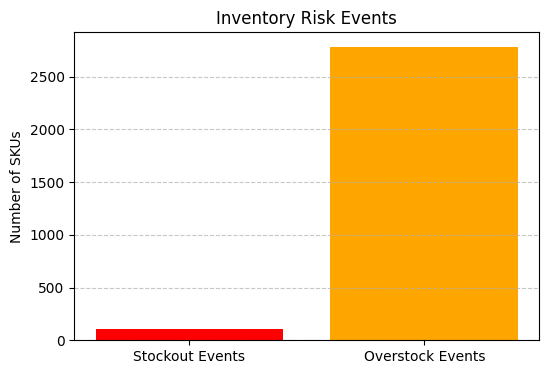

In [ ]:
# Define logical flags for stockout and overstock events
df['Stockout_Flag'] = df['Stock_Quantity'] < df['Weekly_Demand']
df['Overstock_Flag'] = df['Stock_Quantity'] > (2 * df['Weekly_Demand'])

# Count total stockout and overstock events
stockout_count = df['Stockout_Flag'].sum()
overstock_count = df['Overstock_Flag'].sum()

# Display summary
print(f"Total Stockout Events: {stockout_count}")
print(f"Total Overstock Events: {overstock_count}")

# Bar chart for visualization
import matplotlib.pyplot as plt

event_counts = [stockout_count, overstock_count]
event_labels = ['Stockout Events', 'Overstock Events']

plt.figure(figsize=(6,4))
plt.bar(event_labels, event_counts, color=['red', 'orange'])
plt.title('Inventory Risk Events')
plt.ylabel('Number of SKUs')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
print(df.columns.tolist())

['Item_Code', 'Item_Name', 'Category', 'Stock_Quantity', 'Reorder_Level', 'Unit_Price', 'Purchase_Cost', 'Last_Purchase_Date', 'Weekly_Demand', 'Monthly_Sales_Units', 'Sales_Revenue', 'Lead_Time_Days', 'Ordering_Cost', 'Holding_Cost_Per_Unit', 'EOQ', 'Stockout_Events', 'Overstock_Events', 'Supplier_Name', 'Stockout_Flag', 'Overstock_Flag', 'Annual_Demand', 'Holding_Cost_per_Unit']


In [ ]:

df['Monthly_Sales_Value'] = df['Monthly_Sales_Units'] * df['Unit_Price']


In [ ]:
df = df.sort_values(by='Monthly_Sales_Value', ascending=False).reset_index(drop=True)


In [ ]:
df['Cumulative_Sales_Value'] = df['Monthly_Sales_Value'].cumsum()
df['Cumulative_Percent'] = 100 * df['Cumulative_Sales_Value'] / df['Monthly_Sales_Value'].sum()


In [ ]:
def classify_abc(percent):
    if percent <= 80:
        return 'A'
    elif percent <= 95:
        return 'B'
    else:
        return 'C'

df['ABC_Category'] = df['Cumulative_Percent'].apply(classify_abc)


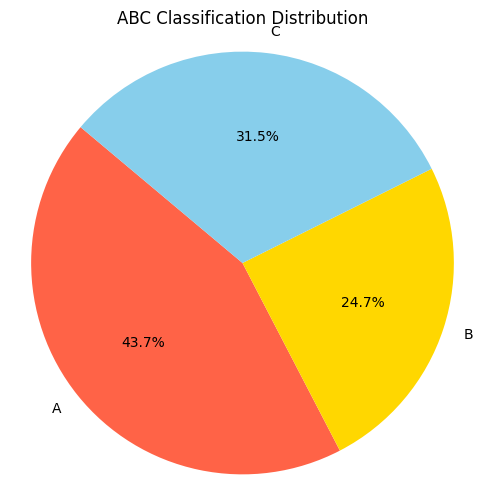

In [ ]:
import matplotlib.pyplot as plt

abc_counts = df['ABC_Category'].value_counts().sort_index()

plt.figure(figsize=(6, 6))
plt.pie(abc_counts, labels=abc_counts.index, autopct='%1.1f%%', startangle=140, colors=['tomato', 'gold', 'skyblue'])
plt.title('ABC Classification Distribution')
plt.axis('equal')
plt.show()


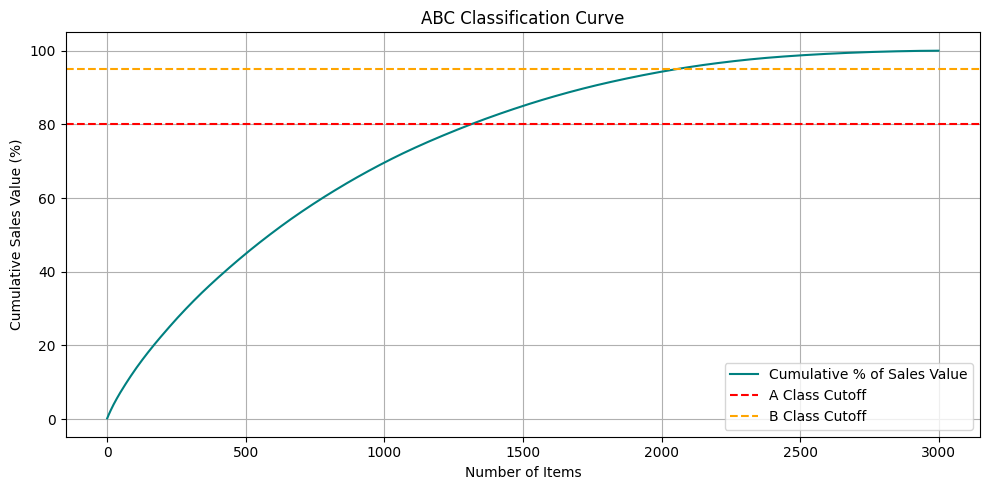

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Cumulative_Percent'], label='Cumulative % of Sales Value', color='teal')
plt.axhline(y=80, color='red', linestyle='--', label='A Class Cutoff')
plt.axhline(y=95, color='orange', linestyle='--', label='B Class Cutoff')
plt.xlabel('Number of Items')
plt.ylabel('Cumulative Sales Value (%)')
plt.title('ABC Classification Curve')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


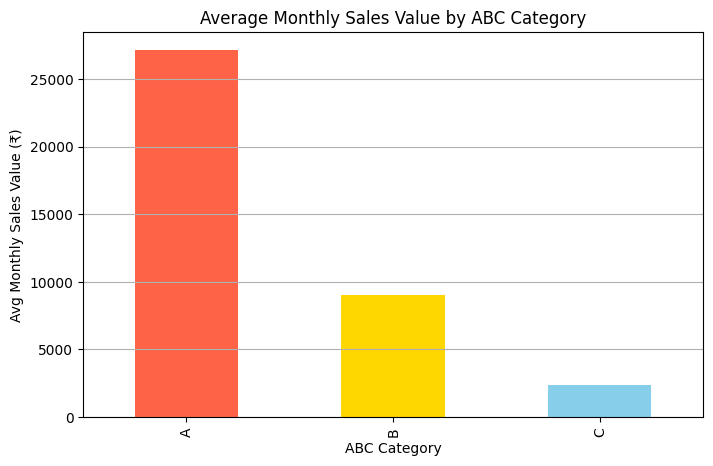

In [ ]:
avg_value_by_class = df.groupby('ABC_Category')['Monthly_Sales_Value'].mean()

plt.figure(figsize=(8, 5))
avg_value_by_class.plot(kind='bar', color=['tomato', 'gold', 'skyblue'])
plt.title('Average Monthly Sales Value by ABC Category')
plt.ylabel('Avg Monthly Sales Value (₹)')
plt.xlabel('ABC Category')
plt.grid(axis='y')
plt.show()


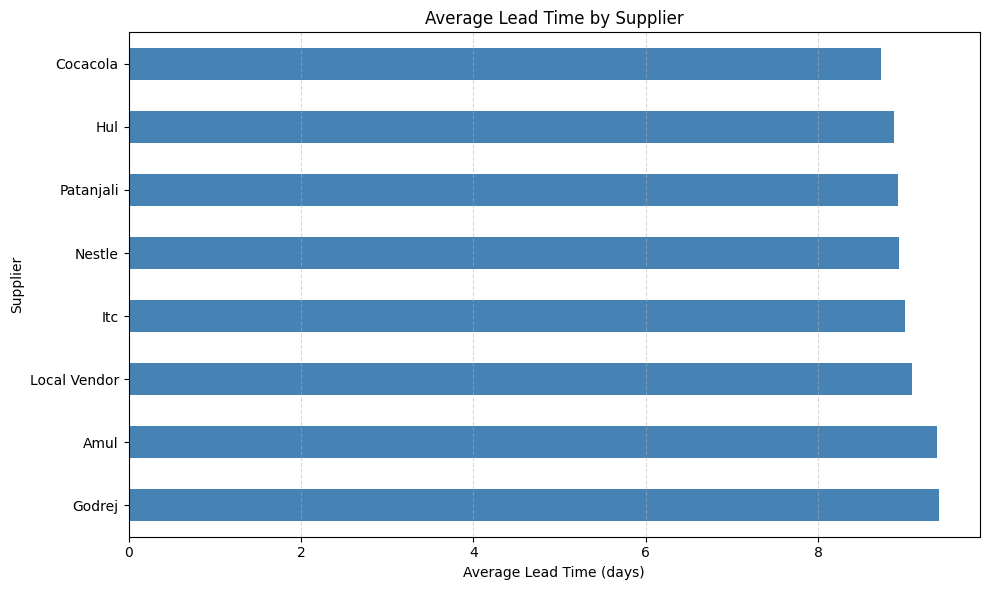

,Avg_Lead_Time,Stockout_Events
Supplier_Name,,
Godrej,9.409605,79
Amul,9.382514,66
Local Vendor,9.090476,72
Itc,9.008547,69
Nestle,8.937500,58


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Supplier to get average lead time
supplier_lead_time = df.groupby('Supplier_Name')['Lead_Time_Days'].mean().sort_values(ascending=False)

if 'Stockout_Events' in df.columns:
    stockouts = df.groupby('Supplier_Name')['Stockout_Events'].sum()
    supplier_summary = pd.DataFrame({
        'Avg_Lead_Time': supplier_lead_time,
        'Stockout_Events': stockouts
    }).sort_values('Avg_Lead_Time', ascending=False)
else:
    supplier_summary = pd.DataFrame({
        'Avg_Lead_Time': supplier_lead_time
    })

# Bar plot for lead time
plt.figure(figsize=(10, 6))
supplier_summary['Avg_Lead_Time'].plot(kind='barh', color='steelblue')
plt.xlabel('Average Lead Time (days)')
plt.ylabel('Supplier')
plt.title('Average Lead Time by Supplier')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

supplier_summary.head()


In [ ]:
# Ensure Last_Purchase_Date is in datetime format
df['Last_Purchase_Date'] = pd.to_datetime(df['Last_Purchase_Date'], errors='coerce')

# Extract the year-month part for trend grouping
df['Month'] = df['Last_Purchase_Date'].dt.to_period('M')  # e.g., 2024-01


In [ ]:
# Aggregate total sales across all products per month
monthly_trend = df.groupby('Month')['Monthly_Sales_Units'].sum().reset_index()
monthly_trend['Month'] = monthly_trend['Month'].astype(str)


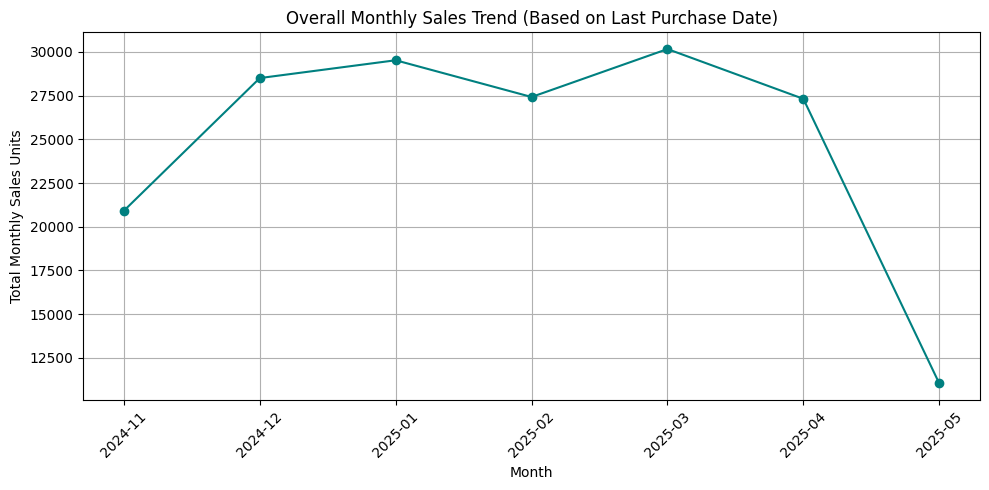

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(monthly_trend['Month'], monthly_trend['Monthly_Sales_Units'], marker='o', color='teal')
plt.title("Overall Monthly Sales Trend (Based on Last Purchase Date)")
plt.xlabel("Month")
plt.ylabel("Total Monthly Sales Units")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


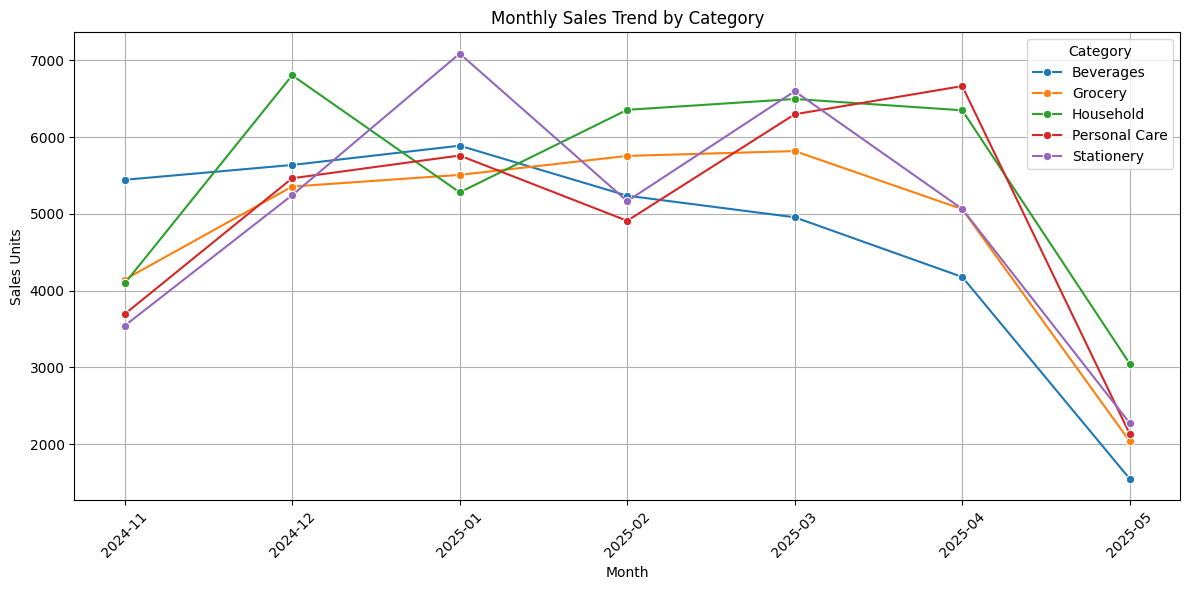

In [ ]:
# Group by Month and Category to observe trends per category
category_trend = df.groupby(['Month', 'Category'])['Monthly_Sales_Units'].sum().reset_index()
category_trend['Month'] = category_trend['Month'].astype(str)

import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=category_trend, x='Month', y='Monthly_Sales_Units', hue='Category', marker='o')
plt.title("Monthly Sales Trend by Category")
plt.xlabel("Month")
plt.ylabel("Sales Units")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


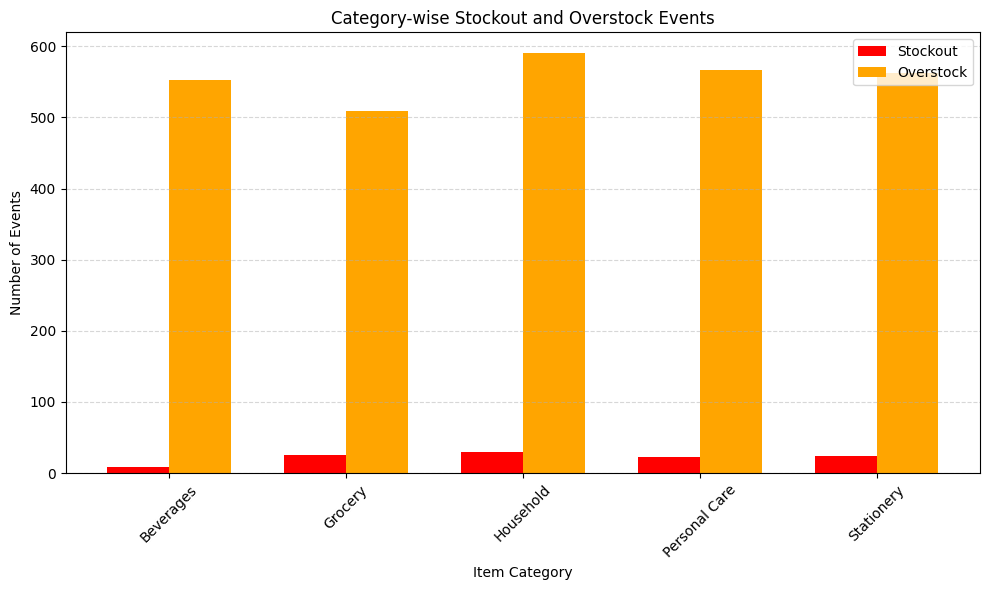

        Category  Stockout_Flag  Overstock_Flag
0      Beverages              8             552
1        Grocery             26             509
2      Household             30             590
3  Personal Care             23             567
4     Stationery             24             563


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

df['Stockout_Flag'] = df['Stock_Quantity'] < df['Weekly_Demand']
df['Overstock_Flag'] = df['Stock_Quantity'] > (2 * df['Weekly_Demand'])

# Group by category and sum stockout/overstock flags
risk_summary = df.groupby('Category')[['Stockout_Flag', 'Overstock_Flag']].sum().reset_index()

# Plot
x = np.arange(len(risk_summary['Category']))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, risk_summary['Stockout_Flag'], width, label='Stockout', color='red')
plt.bar(x + width/2, risk_summary['Overstock_Flag'], width, label='Overstock', color='orange')

plt.xticks(x, risk_summary['Category'], rotation=45)
plt.title('Category-wise Stockout and Overstock Events')
plt.xlabel('Item Category')
plt.ylabel('Number of Events')
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# Print summary
print(risk_summary)


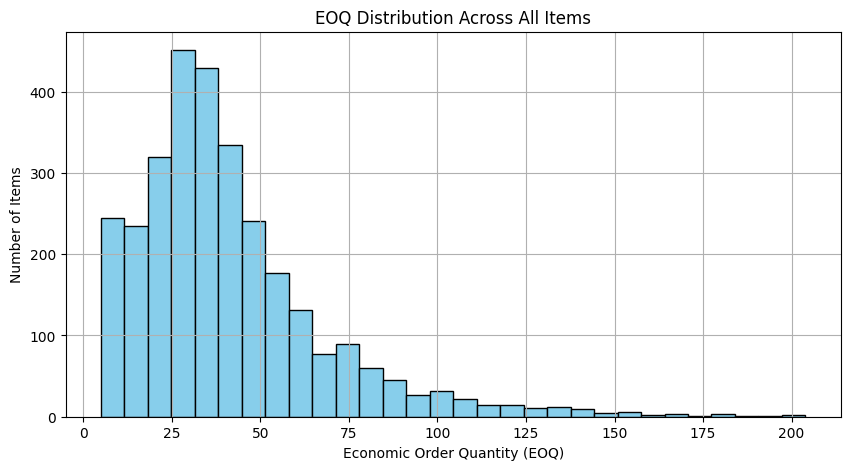

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(df['EOQ'], bins=30, color='skyblue', edgecolor='black')
plt.title('EOQ Distribution Across All Items')
plt.xlabel('Economic Order Quantity (EOQ)')
plt.ylabel('Number of Items')
plt.grid(True)
plt.show()

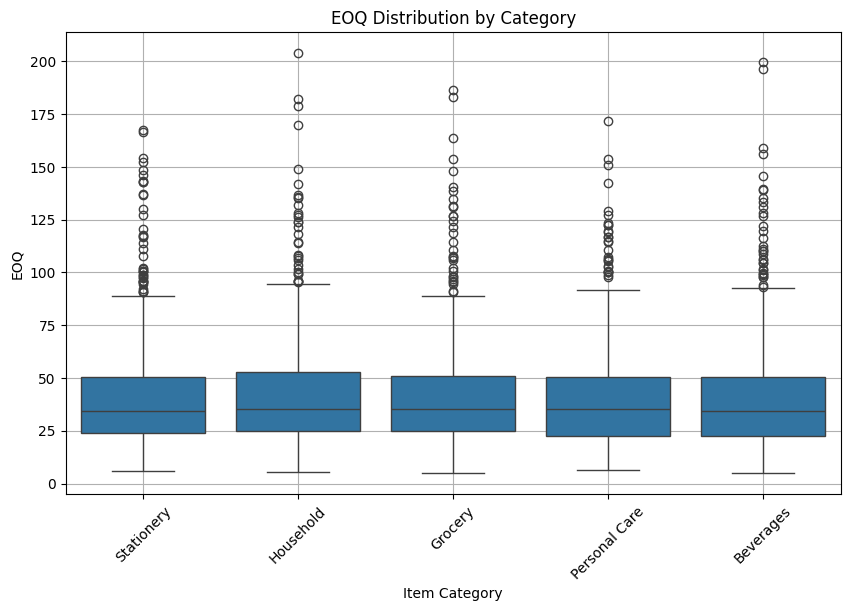

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='EOQ', data=df)
plt.title('EOQ Distribution by Category')
plt.xlabel('Item Category')
plt.ylabel('EOQ')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

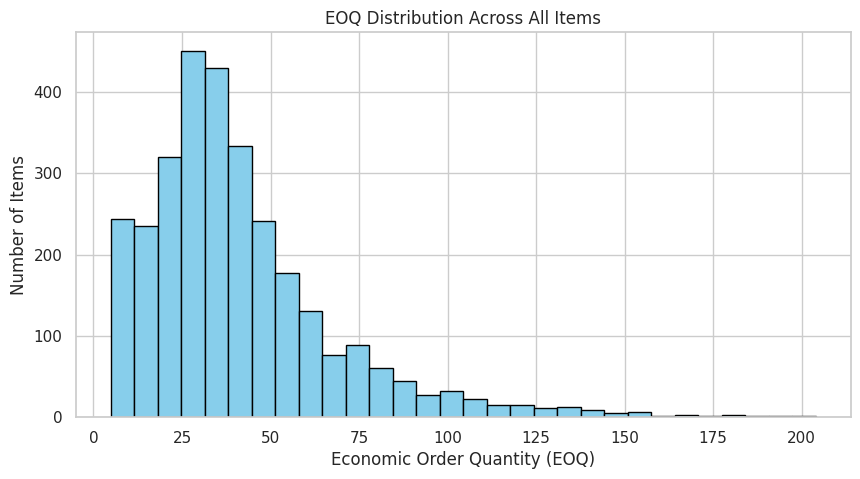

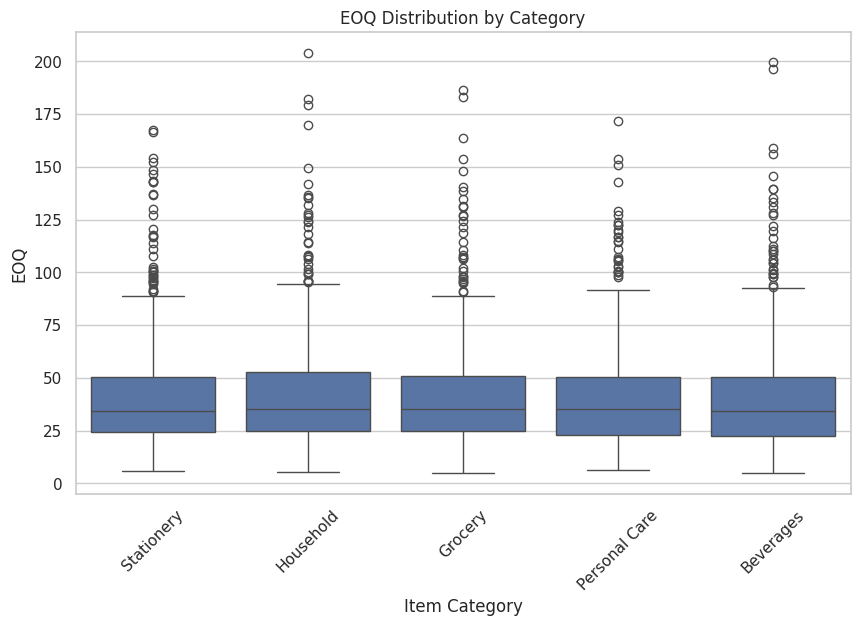

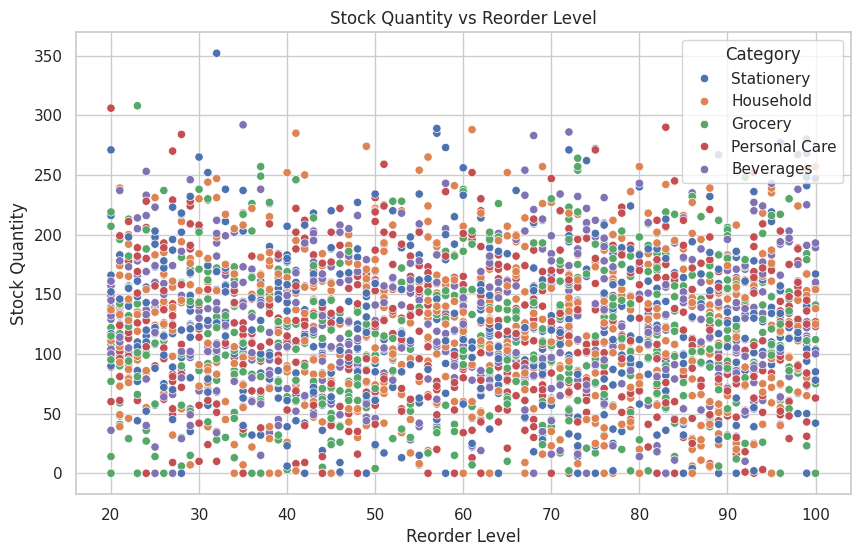

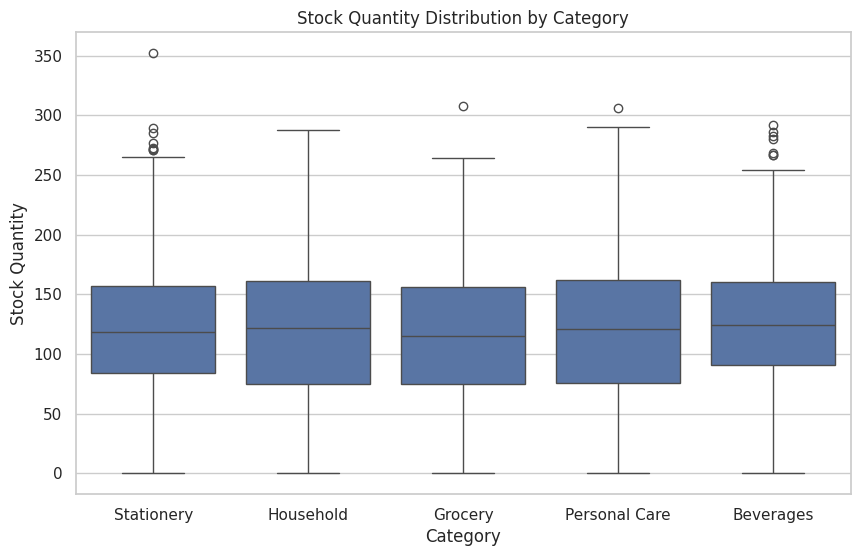

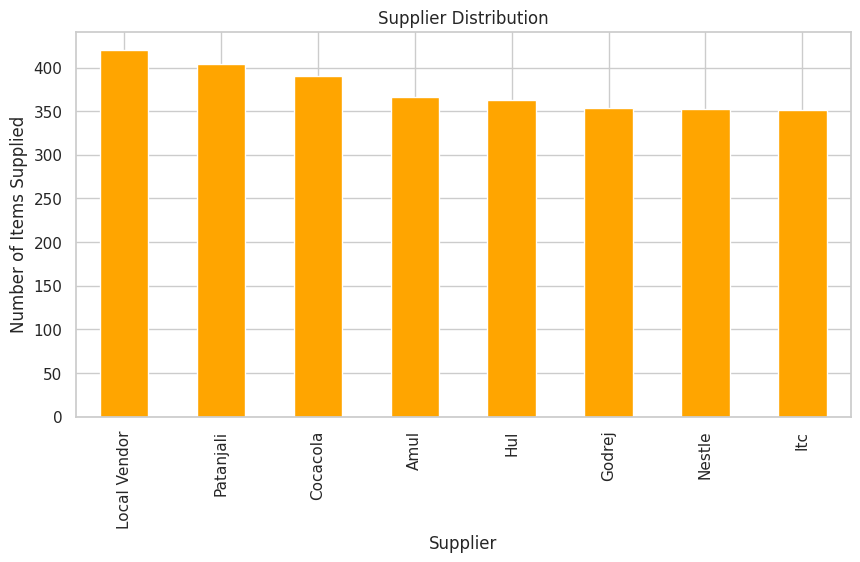

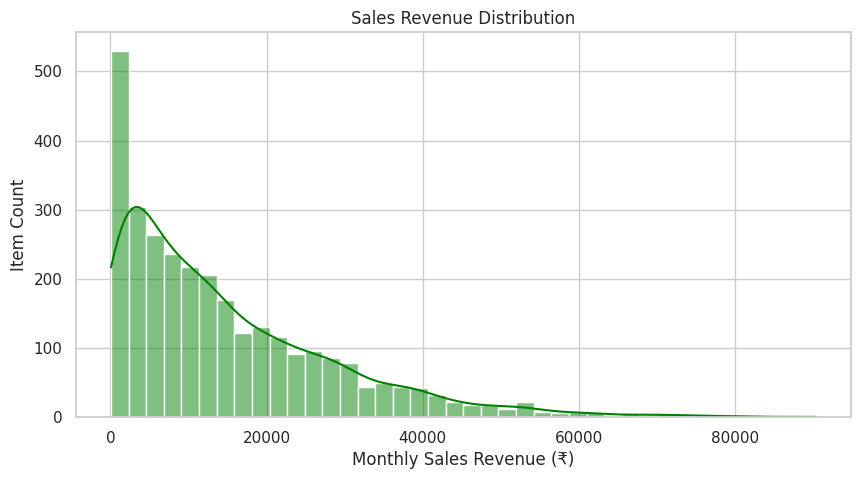

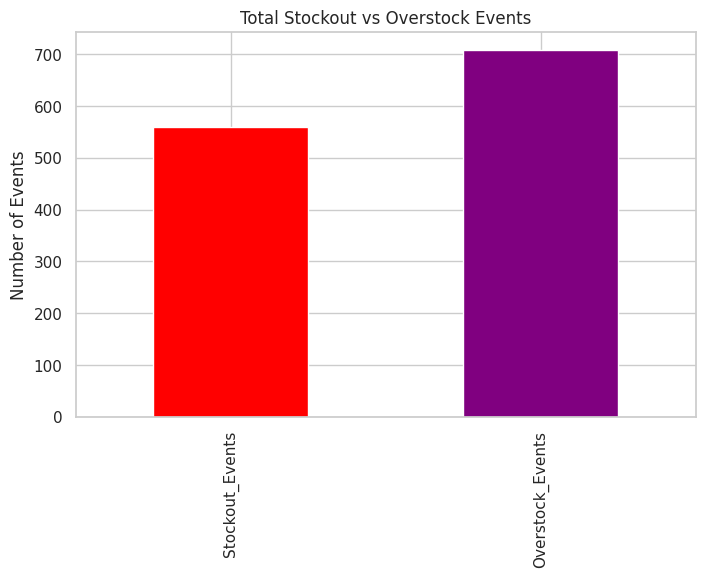

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df['Supplier_Name'] = df['Supplier_Name'].str.strip().str.title()

# Set style
sns.set(style="whitegrid")

# 1. EOQ Distribution
plt.figure(figsize=(10, 5))
plt.hist(df['EOQ'], bins=30, color='skyblue', edgecolor='black')
plt.title('EOQ Distribution Across All Items')
plt.xlabel('Economic Order Quantity (EOQ)')
plt.ylabel('Number of Items')
plt.show()

# 2. EOQ by Category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='EOQ', data=df)
plt.title('EOQ Distribution by Category')
plt.xlabel('Item Category')
plt.ylabel('EOQ')
plt.xticks(rotation=45)
plt.show()

# 3. Stock Levels vs. Reorder Level
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Reorder_Level', y='Stock_Quantity', hue='Category', data=df)
plt.title('Stock Quantity vs Reorder Level')
plt.xlabel('Reorder Level')
plt.ylabel('Stock Quantity')
plt.show()

# 4. Category-wise Stock Distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Stock_Quantity', data=df)
plt.title('Stock Quantity Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Stock Quantity')
plt.show()

# 5. Supplier Frequency
plt.figure(figsize=(10, 5))
df['Supplier_Name'].value_counts().plot(kind='bar', color='orange')
plt.title('Supplier Distribution')
plt.xlabel('Supplier')
plt.ylabel('Number of Items Supplied')
plt.show()

# 6. Sales Revenue Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['Sales_Revenue'], bins=40, kde=True, color='green')
plt.title('Sales Revenue Distribution')
plt.xlabel('Monthly Sales Revenue (₹)')
plt.ylabel('Item Count')
plt.show()

# 7. Stockout vs Overstock Events
plt.figure(figsize=(8, 5))
df[['Stockout_Events', 'Overstock_Events']].sum().plot(kind='bar', color=['red', 'purple'])
plt.title('Total Stockout vs Overstock Events')
plt.ylabel('Number of Events')
plt.show()

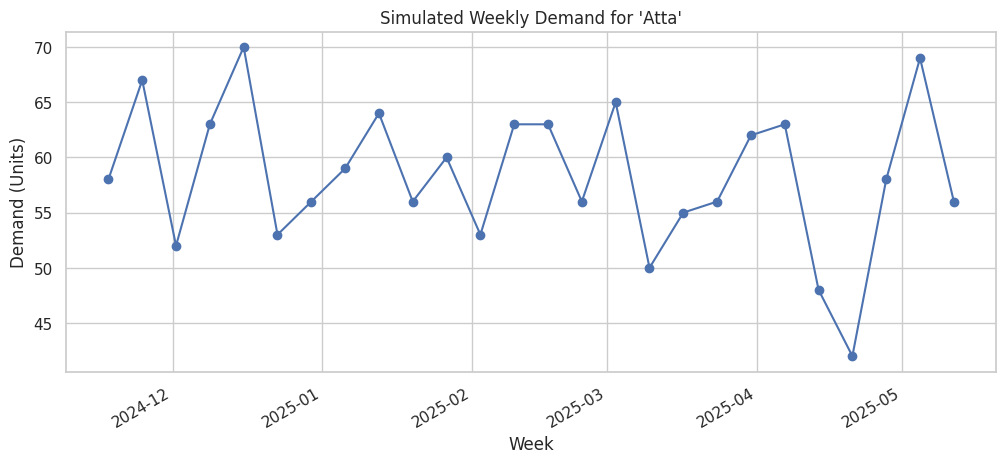

In [ ]:
import numpy as np

# Select a sample high-demand item
sample_item = df.sort_values('Weekly_Demand', ascending=False).iloc[0]
item_name = sample_item['Item_Name']
weekly_demand = sample_item['Weekly_Demand']

# Simulate 26 weeks of past weekly demand with noise
np.random.seed(42)
weeks = pd.date_range(end=pd.Timestamp.today(), periods=26, freq='W')
demand_series = pd.Series(
    np.random.poisson(weekly_demand, size=26),
    index=weeks
)

# Plot the historical demand
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
demand_series.plot(marker='o')
plt.title(f"Simulated Weekly Demand for '{item_name}'")
plt.xlabel("Week")
plt.ylabel("Demand (Units)")
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


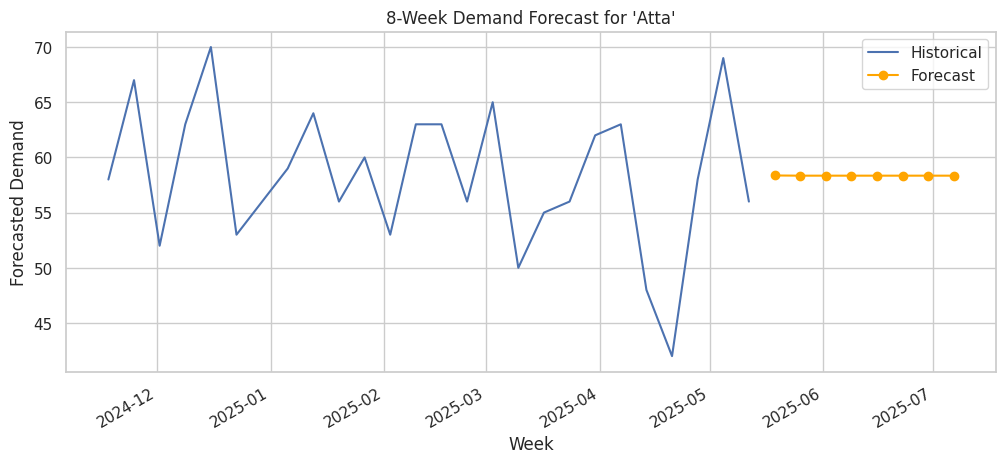

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(demand_series, order=(1, 1, 1))
model_fit = model.fit()

# Forecast next 8 weeks
forecast = model_fit.forecast(steps=8)

# Plot forecast
plt.figure(figsize=(12, 5))
demand_series.plot(label='Historical')
forecast.plot(label='Forecast', marker='o', color='orange')
plt.title(f"8-Week Demand Forecast for '{item_name}'")
plt.xlabel("Week")
plt.ylabel("Forecasted Demand")
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


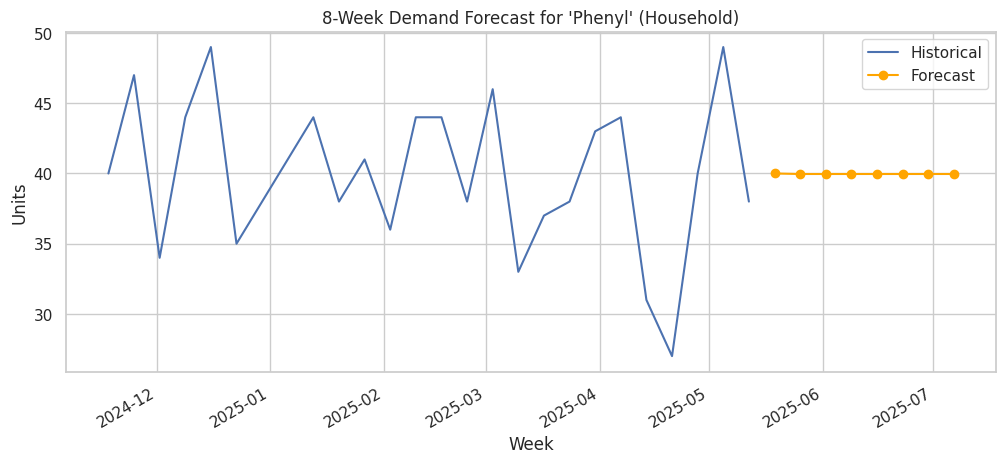

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


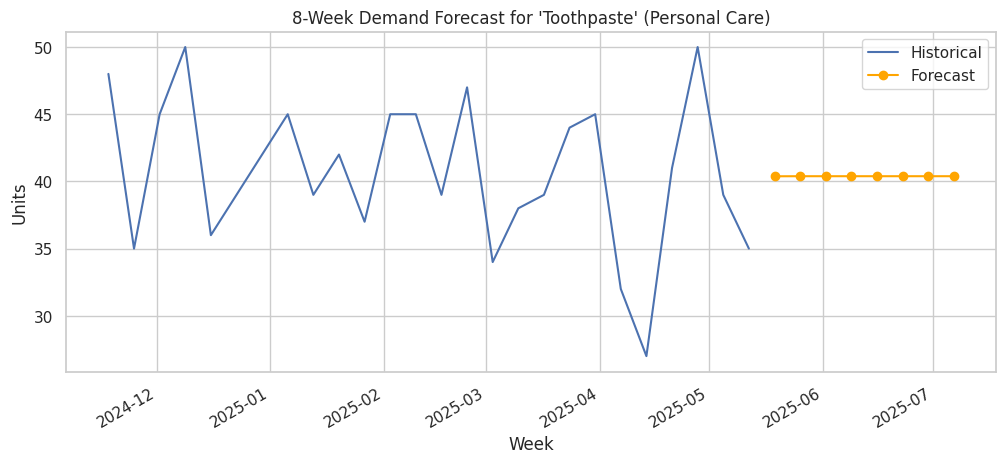

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


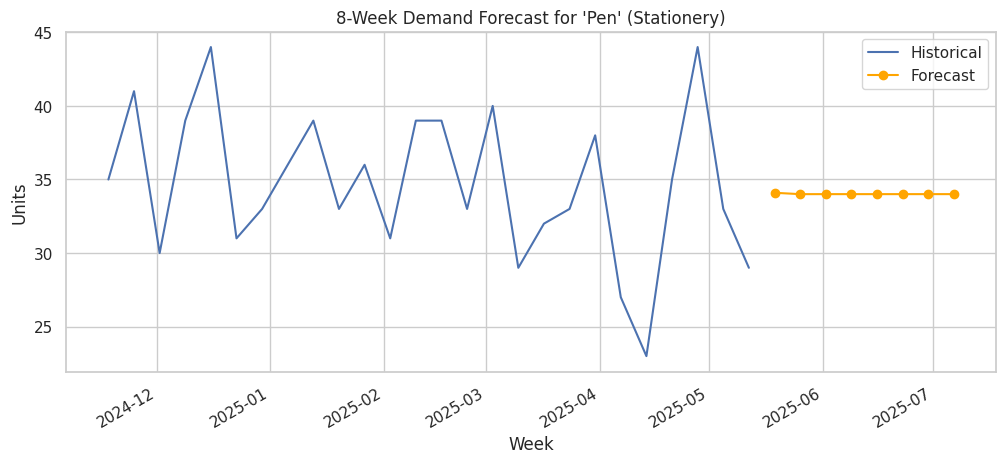

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


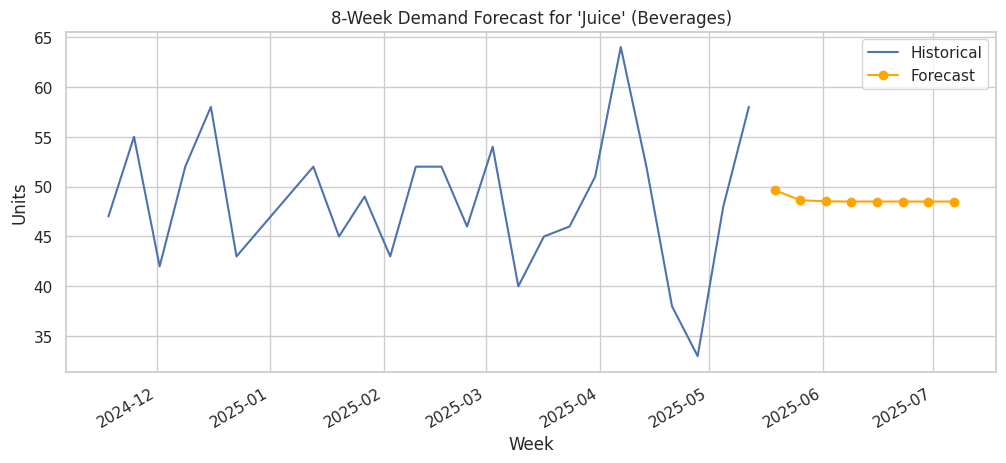

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


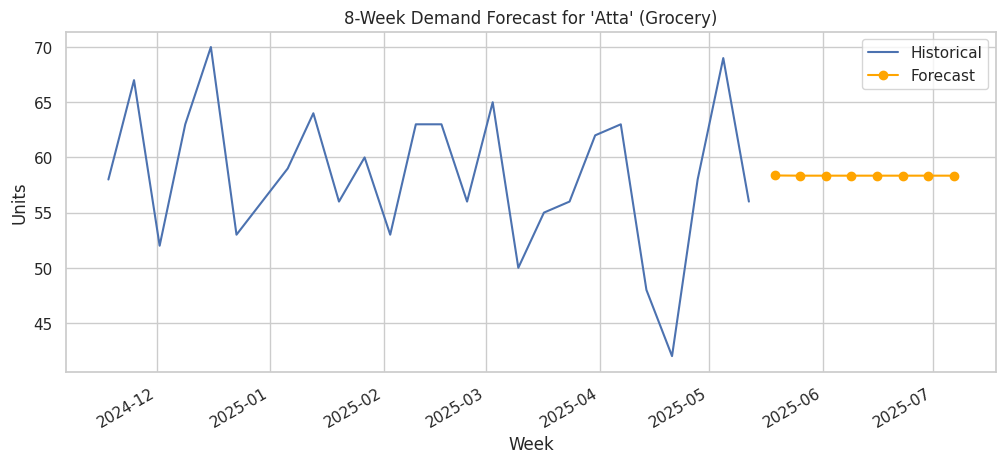

In [ ]:
# Forecasting for one item per top 5 category
top_categories = df['Category'].value_counts().head(5).index.tolist()
for category in top_categories:
    item = df[df['Category'] == category].sort_values('Weekly_Demand', ascending=False).iloc[0]
    item_name = item['Item_Name']
    weekly_demand = item['Weekly_Demand']

    np.random.seed(42)
    weeks = pd.date_range(end=pd.Timestamp.today(), periods=26, freq='W')
    demand_series = pd.Series(np.random.poisson(weekly_demand, size=26), index=weeks)

    model = ARIMA(demand_series, order=(1, 1, 1))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=8)

    plt.figure(figsize=(12, 5))
    demand_series.plot(label='Historical')
    forecast.plot(label='Forecast', marker='o', color='orange')
    plt.title(f"8-Week Demand Forecast for '{item_name}' ({category})")
    plt.xlabel("Week")
    plt.ylabel("Units")
    plt.legend()
    plt.grid(True)
    plt.show()